# Plotting the average of MAPE score (quality) for lstms when we gradually make the architecture more complex (complexity)

## imports

In [10]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [11]:
from src.RQ1_forecast import *

In [12]:
num_samples = 100

In [13]:
data_address1 = '/home/dev/deepts/experiments/lstm/electricity/3A'

# metric section

In [14]:
import re
# does the natural sorting of the files
def read_csv_result1(result_type, address, n_files=None):
    rootdir = address
    os.path.isdir(rootdir)

    df_list = []
    filenames = []

    for subdir, _, files in tqdm(os.walk(rootdir)):
        # print(files)
        # print(subdir)
        # print('\n')
        filenames += [os.path.join(subdir, file) for file in files if file == result_type]
    filenames.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

    # if n_files is not None:
    #     filenames = filenames[:n_files]

    for i in range(0, len(filenames), 16):
        # print(f"i is {i}")
        # print(filenames[i:i+16])
        # print("\n")
        repetition_list = []
        for filename in tqdm(filenames[i:i+16], ascii=True, ncols=50):
            df = pd.read_csv(filename)
            repetition_list.append(df)
        df_list.append(repetition_list)
    return df_list


In [15]:
# loop through all the runs in the results folder and read the metric dataframe

metrics_list1 = read_csv_result1('metrics.csv', data_address1)

69it [00:00, 30541.05it/s]
100%|############| 16/16 [00:00<00:00, 119.08it/s]


In [16]:
len(metrics_list1[0]), len(metrics_list1)

(16, 4)

In [17]:
mean_mape = np.zeros((len(metrics_list1), len(metrics_list1[0])))
print(mean_mape.shape)
for idx, repetition in enumerate(metrics_list1):
    for jdx, rep_cel in enumerate(repetition):
        mean_mape[idx, jdx] = rep_cel['MAPE'].mean()

mean_mape

(4, 16)


array([[0.43705341, 0.15705819, 0.11678988, 0.187541  , 0.21323639,
        0.15809866, 0.12372547, 0.15379673, 0.24045591, 0.12266891,
        0.11713797, 0.12066249, 0.17477449, 0.16820126, 0.13786126,
        0.11377235],
       [0.1880424 , 0.17588675, 0.14982493, 0.12794634, 0.14613278,
        0.09985246, 0.13208597, 0.19820869, 0.12922867, 0.11747281,
        0.11496669, 0.15577113, 0.12868098, 0.1181794 , 0.13431655,
        0.13727891],
       [0.15414753, 0.13083957, 0.13682939, 0.15247809, 0.1362032 ,
        0.11556388, 0.12410091, 0.13778193, 0.12942069, 0.20730846,
        0.12244456, 0.12385626, 0.11552016, 0.12125542, 0.16872236,
        0.11580477],
       [0.12468152, 0.1217228 , 0.13473933, 0.12938426, 0.14958587,
        0.11150054, 0.10576944, 0.21087881, 0.10918946, 0.10934491,
        0.12529972, 0.11201285, 0.21976724, 0.10277908, 0.15024632,
        0.11335984]])

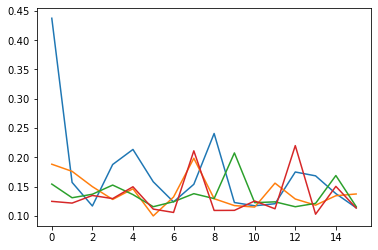

In [18]:
plt.plot(mean_mape[0])
plt.plot(mean_mape[1])
plt.plot(mean_mape[2])
plt.plot(mean_mape[3])